In [1]:
# import modules
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
import pandas as pd
import math
%matplotlib inline

In [2]:
# Read Text File in Python
#5050 weighting
Filename1 = "Accepted_Final_SM_test1.csv"  #"RPM_dakota_w.dat"
DF1 = pd.read_csv(Filename1,sep = ",",engine='python')
DF1.head()

,Unnamed: 0,mcmc_id,interface,FR,K,Y,rmse,CRNrmse,Reject,Like
0,0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62,False,-6.57974
1,1,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09,False,-6.41606
2,2,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01,False,-4.35371
3,3,6,NO_ID,1.198227,-4.001504,-1.469654,1.612860,2213.28,False,-6.37413
4,4,11,NO_ID,2.867350,-2.658376,-1.472506,1.359620,1714.91,False,-4.88589


In [3]:
DF1['likelihood'] = np.exp((DF1.Like))
DF1.head()

,Unnamed: 0,mcmc_id,interface,FR,K,Y,rmse,CRNrmse,Reject,Like,likelihood
0,0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62,False,-6.57974,0.001388
1,1,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09,False,-6.41606,0.001635
2,2,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01,False,-4.35371,0.012859
3,3,6,NO_ID,1.198227,-4.001504,-1.469654,1.612860,2213.28,False,-6.37413,0.001705
4,4,11,NO_ID,2.867350,-2.658376,-1.472506,1.359620,1714.91,False,-4.88589,0.007552


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

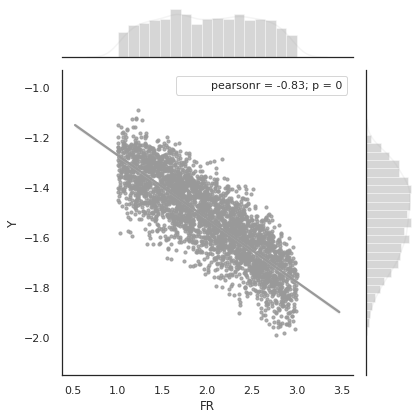

<Figure size 432x288 with 0 Axes>

In [239]:
#look at joint plots - weighted 

import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

fig1 = plt.figure(1)

#fig2 = plt.figure(2)
plt.figure(figsize=(10,10))

#axes 1 plot FR & K 

x1 = DF1.FR
y1 = DF1.Y

#x2 = DFm.Y
#y2 = DFm.FR

#DFm = DF.where(DF.rmse < 99999)

plt.set_cmap('viridis_r')

#colors=np.log((DF1.Like)*-1)

#DFnan = DFm.dropna()
#Weights = (DFnan.rmse.max()-DFnan.rmse)/(DFnan.rmse.max()-DFnan.rmse.min())


g = sns.jointplot(x1,y1,data=DF1,color=[0.6,0.6,0.6,0.1],scatter_kws={"s": 10},kind='reg') ####.plot_joint(sns.kdeplot, cmap='viridis',n_levels=5), zorder=0, n_levels=5))
#g = (sns.jointplot(x2,y2,data=DFm, color="r", s=5).plot_joint(sns.kdeplot, zorder=0, n_levels=6))

g.annotate(stats.pearsonr)
#g = sns.jointplot(x1,y1, data=DF, color="k")
#g = sns.jointplot(x2,y2, data=DF, color="b")
#g.plot_marginals(sns.distplot, color="k")
#g.plot_joint(sns.kdeplot, weights=Weights, color="k")
#plt.scatter(x1, y1, s=10, alpha = .8, c = np.log(DFm.rmse), cmap = 'viridis')
#g.jointplot(x="x1", y="y1", data=DF);

#sns.scatterplot(x2, y2, alpha = 1, c="k", s=10)

#plt.scatter(x1, y1, alpha = 1, c=np.log((DF1.Like)*-1), s=10) #c = np.log(DFm.rmse), cmap = 'viridis')
#c=np.log(DFm.CRNrmse)
#cbar = plt.colorbar()

#plt.ylim(-3, 1)
#plt.xlim(1, 3)

fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
#fig1.savefig('Residuals.png',dpi=300)

<Figure size 720x720 with 0 Axes>

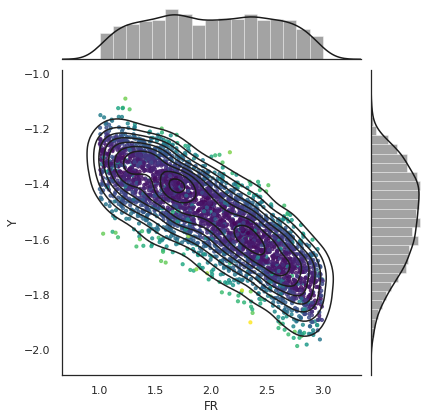

In [182]:
#look at joint plots - weighted 

import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

#fig2 = plt.figure(2)
plt.figure(figsize=(10,10))

#axes 1 plot FR & K 

x1 = DF1.FR
y1 = DF1.Y

#DFm = DF.where(DF.CRNrmse < 99999)

#DFnan = DFm.dropna()
#Weights = np.log((DF1.Like)*-1) #(DFnan.CRNrmse.max()-DFnan.CRNrmse)/(DFnan.CRNrmse.max()-DFnan.CRNrmse.min())

g = sns.JointGrid(x1,y1, data=DF1)
g.plot_marginals(sns.distplot, color="k")
g.plot_joint(sns.kdeplot,color="k")  #weights=Weights, color="k")

plt.scatter(x1, y1, s=10, alpha = .8, c = np.log((DF1.Like)*-1), cmap = 'viridis')


#g = sns.jointplot(x1,y1,data=DF1, color = np.log((DF1.Like)*-1),kind='reg')
#c=np.log(DFm.CRNrmse)
#cbar = plt.colorbar()

#plt.savefig('RUN131_jointplot_FRK_CRN.png',dpi=300)

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

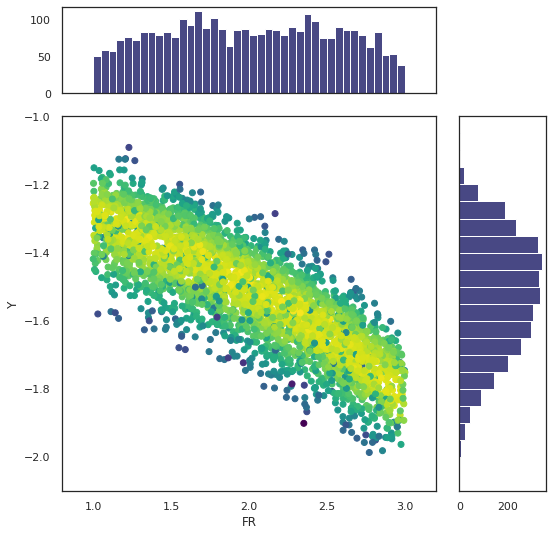

<Figure size 432x288 with 0 Axes>

In [188]:
# some random data
x = DF1.FR
y = DF1.Y


fig = plt.figure(1)

plt.set_cmap('viridis_r')
plt.figure(figsize=(10,10))

# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=16)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 5



def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c=np.log((DF1.Like)*-1))

    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,color=[0.1,0.1,0.4,0.8])
    ax_histy.hist(y, bins=bins,color=[0.1,0.1,0.4,0.8], orientation='horizontal')
    
    
    # definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.04


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_ylim(-2.1,-1)
ax.set_xlim(0.8,3.2)

ax.set_xlabel('FR')
ax.set_ylabel('Y')

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

fig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig.savefig('scatter_hist_CB_fig.png',dpi=300)